In [1]:
import keras
from keras import applications

import matplotlib.pylab as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
pretrained_vgg_16 = applications.VGG16(weights = 'imagenet', include_top = True)

In [3]:
pretrained_vgg_16.layers[-2].get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'name': 'fc2',
 'trainable': True,
 'units': 4096,
 'use_bias': True}

In [7]:
from keras.models import Model

#building a new model that gets as input the shapes of inputs of vgg16 
# and outputs the activations on the penultimate layer of vgg16 (the layer is called fc2)
layer_name = 'fc2'
intermediate_layer_model = Model(inputs=pretrained_vgg_16.input,
                                 outputs=pretrained_vgg_16.get_layer(layer_name).output)

In [8]:
#reading an image using opencv
import cv2
im_path = '/home/ubuntu/Downloads/1.jpg'
image = cv2.imread(im_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [9]:
#reading an image using PIL
from PIL import Image
import numpy as np
image_pil = Image.open(im_path)
image_pil = np.array(image_pil)

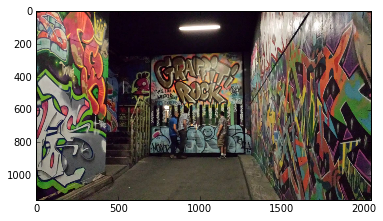

In [10]:
plt.imshow(image)

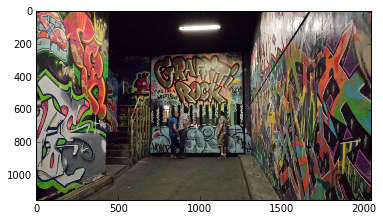

In [11]:
plt.imshow(image_pil)

In [12]:
#resizing the image using scipy
from scipy.misc import imresize
imresize_pil = imresize(image_pil,(224,224))

/home/ubuntu/anaconda2/envs/deep-learning/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  app.launch_new_instance()


In [13]:
imresize_pil.shape

(224, 224, 3)

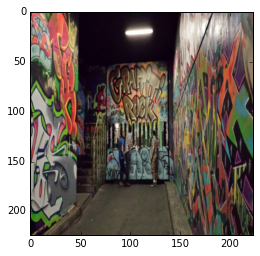

In [14]:
plt.imshow(imresize_pil)

In [15]:
#resizing the image using opencv
resized_image = cv2.resize(image,(224,224))

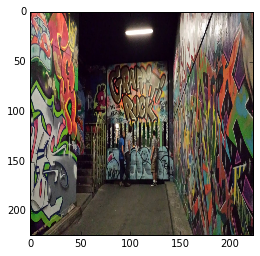

In [17]:
plt.imshow(resized_image)

In [16]:
#adding a dummy dimension
resized_image_with_dummy_dimensions = resized_image[None,:,:,:]

In [18]:
#getting the feature vector for this image
feature_vec = intermediate_layer_model.predict(resized_image_with_dummy_dimensions)

In [19]:
feature_vec.shape

(1, 4096)